<h1 align="center"> Homework 10 Programming Task (10 Points) </h1>
<h3 align="center"> IST 5520, Fall 2022 </h3>
<h3 align="center"> By:  Ronald Adomako</h3>
<h3 align="center"> Last Update: 11/16/2022 </h3>

In [6]:
import patsy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Task A: Data Manipulation
1. Read the dataset into a pandas DataFrame. Show the datatype of variables in the dataset.

In [7]:
df = pd.read_csv('DC_Bike_Rentals.csv')

In [8]:
df

,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,0,1,0,0,1,9.84,14.395,81,0.0000,16
1,1,1,0,0,1,9.02,13.635,80,0.0000,40
2,2,1,0,0,1,9.02,13.635,80,0.0000,32
3,3,1,0,0,1,9.84,14.395,75,0.0000,13
4,4,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,19,4,0,1,1,15.58,19.695,50,26.0027,336
10882,20,4,0,1,1,14.76,17.425,57,15.0013,241
10883,21,4,0,1,1,13.94,15.910,61,15.0013,168
10884,22,4,0,1,1,13.94,17.425,61,6.0032,129


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hour        10886 non-null  int64  
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 850.6 KB



2. A very important step in predictive analytics is to represent different scales of measurement
correctly in the dataset. What variables in the dataset should be represented as categorical
variables? List them in the box.



    Variables that should be represented as categorical variables:

    Transform data if necessary. Create y and X objects to represent the response variable and
predictors. Use one-hot encoding to represent categorical predictors.


3. Use 40-60% data partition strategy, with 40% of data used as test data. 


## Step 2: Logistic Regression (5 points)

Implement a logistic regression model (on the entire dataset) that models the status of a bank as a function of the two financial measures provided. Interpret the estimates of coefficients.

Note: Feel free to add more code lines below to implement the logic.

In [79]:
df = pd.read_csv('banks.csv',index_col='Obs')
df

,Financial Condition,TotCap/Assets,TotExp/Assets,TotLns&Lses/Assets
Obs,,,,
1,1,9.7,0.12,0.65
2,1,1.0,0.11,0.62
3,1,6.9,0.09,1.02
4,1,5.8,0.10,0.67
5,1,4.3,0.11,0.69
6,1,9.1,0.13,0.74
7,1,11.9,0.10,0.79
8,1,8.1,0.13,0.63
9,1,9.3,0.16,0.72


In [34]:
# Descriptive statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Financial Condition,20.0,0.5000,0.512989,0.00,0.000,0.50,1.0000,1.00
TotCap/Assets,20.0,9.3200,4.797214,1.00,7.125,9.20,11.3000,20.50
TotExp/Assets,20.0,0.1045,0.026052,0.07,0.080,0.10,0.1200,0.16
TotLns&Lses/Assets,20.0,0.6285,0.159779,0.30,0.525,0.64,0.7225,1.02


Calculate marginal effects and interpret the estimates of marginal effects.

In [45]:
y = df['Financial Condition']
X = df.loc[:,'TotExp/Assets':]
X.head()

,TotExp/Assets,TotLns&Lses/Assets
Obs,,
1,0.12,0.65
2,0.11,0.62
3,0.09,1.02
4,0.10,0.67
5,0.11,0.69


In [46]:
train_y,test_y,train_X,test_X = train_test_split(y, X,
                                                 test_size=0.2,
                                                 stratify=y,
                                                 random_state=123)

In [47]:
logit1 = LogisticRegression(solver='liblinear')
logit1.fit(train_X, train_y)

LogisticRegression(solver='liblinear')

In [48]:
pred_y_logit1 = logit1.predict(test_X)

# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    plt.plot()

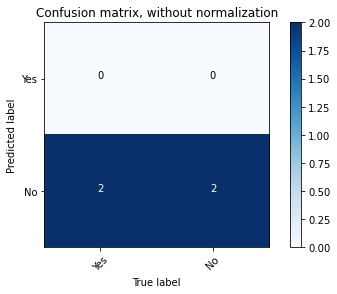

In [53]:
# Compute confusion matrix
cnf_matrix_logit1 = metrics.confusion_matrix(pred_y_logit1, test_y, labels=[0,1])

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix_logit1, classes=['Yes','No'],
                      title='Confusion matrix, without normalization')

In [54]:
print(metrics.classification_report(test_y,pred_y_logit1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



/opt/anaconda3/envs/MyEnv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/MyEnv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/MyEnv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
#logit1.score?
logit1.score(X,y)

0.7

#### Solution
Mean accuracy is 70%. By assigning a higher penalty to 0, banks that are actually weak, but misclassified as strong (0) we can improve our scores. Since we have a small number of observations boot strapping can help provide stable values of our performance scores and is likely to improve our precision, recall, and f1 scores since they are so low.

## Step 3. Predict New Data (2 points)

Consider a new bank whose total loans and leases/assets ratio = 0.6 and total expenses/assets ratio = 0.11. From your logistic regression model, estimate the following two quantities for this bank: 

- the probability of being financially weak;
- the classification of the bank (use cutoff = 0.5).


In [80]:
new_X = pd.DataFrame([[0.11,0.6]],columns=['TotExp/Assets','TotLns&Lses/Assets'])
new_X

,TotExp/Assets,TotLns&Lses/Assets
0,0.11,0.6


#### classification

In [81]:
new_Class = logit1.predict(new_X)
new_Class

array([1])

#### probability

In [82]:
logit1.predict_log_proba(new_X)

array([[-0.72035513, -0.66665994]])

In [83]:
logit1.predict_proba(new_X)

array([[0.48657943, 0.51342057]])

There is a **48.7%** chance that a leases/assets ratio = 0.6 and total expenses/assets ratio = 0.11 is predicted as strong (0)